# Sentiment Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## read the data

In [4]:
columns = ['ID', 'entity', 'sentiment', 'comment']
df = pd.read_csv('data/twitter_training.csv', header=None, names=columns)
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## EDA

In [5]:
df.shape

(74682, 4)

In [6]:
df['entity'].value_counts()

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [7]:
df[df.duplicated()].count()

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

In [8]:
df = df.drop_duplicates()
df.shape

(71982, 4)

In [9]:
df.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

In [10]:
df = df.dropna()
df.shape

(71656, 4)

## Sentiment Analysis

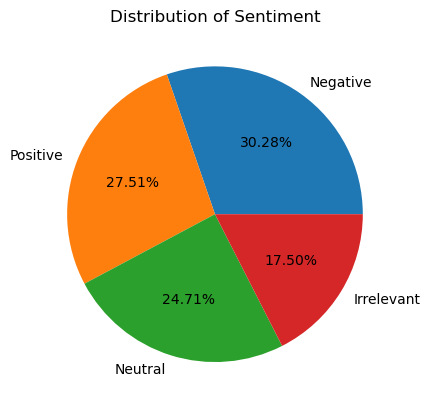

In [11]:
plt.figure()
plt.pie(x=df['sentiment'].value_counts().values, labels=df['sentiment'].value_counts().index, autopct='%.2f%%')
plt.title('Distribution of Sentiment')
plt.show()

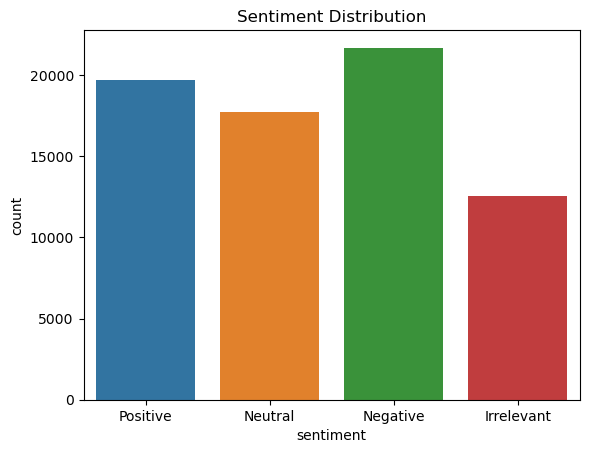

In [12]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()
     

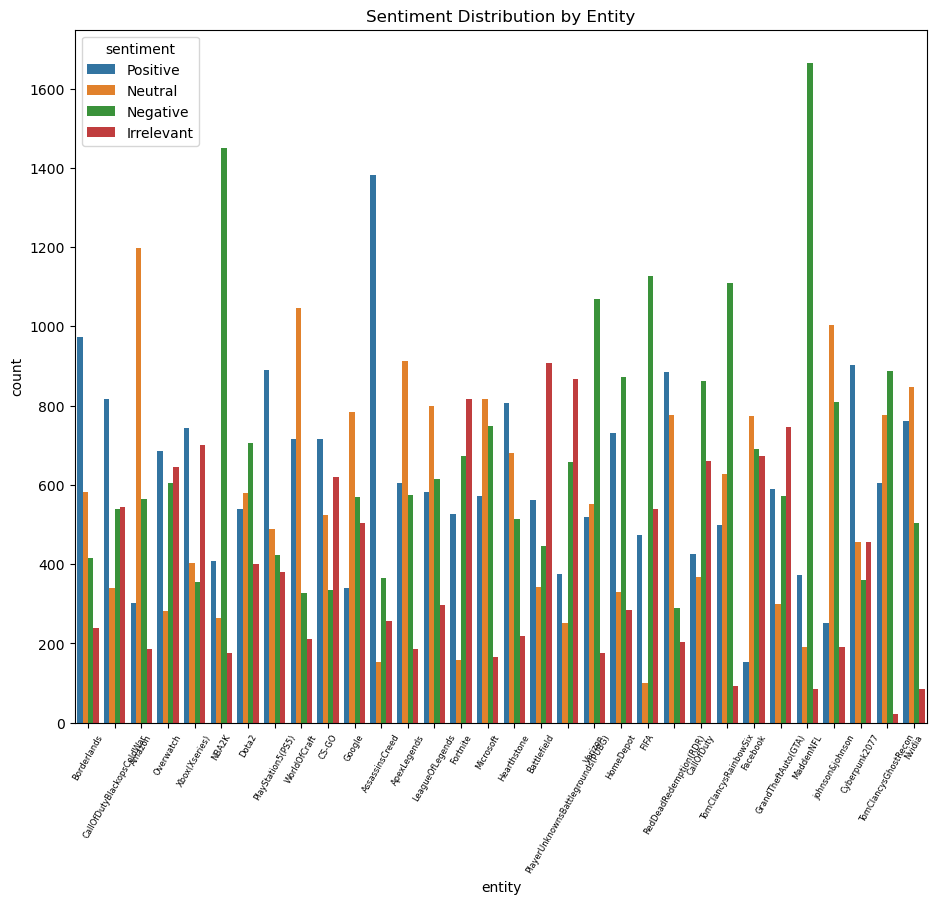

In [13]:
plt.figure(figsize=(11,9))
sns.countplot(x='entity', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=60, fontsize=6)
plt.show()

## word cloud

In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopword=set(stopwords.words('english'))

In [15]:
def clean(comment):
    # Convert text to lowercase
    comment = comment.lower()
    
    # Remove URLs
    comment = re.sub(r'https?://\S+|www\.\S+', '', comment)
    
    # Remove HTML tags
    comment = re.sub('<.*?>', '', comment)
    
    # Remove punctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))
    
    # Remove newlines
    comment = comment.replace('\n', '')
    
    # Remove alphanumeric words
    comment = re.sub(r'\w*\d\w*', '', comment)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    comment = ' '.join(word for word in comment.split() if word not in stop_words)
    
    # Stemming
    stemmer = PorterStemmer()
    comment = ' '.join(stemmer.stem(word) for word in comment.split())
    
    return comment

In [16]:
df["comment"] = df["comment"].apply(clean)
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [17]:
from wordcloud import WordCloud, STOPWORDS

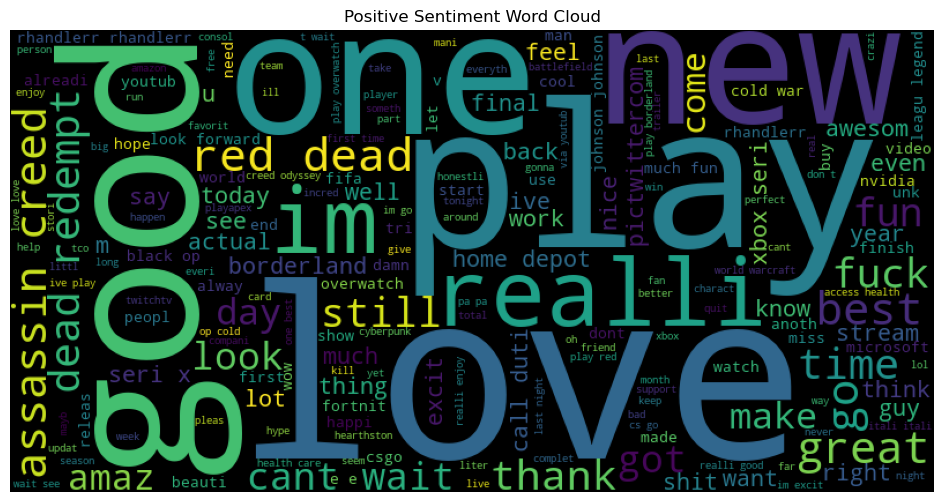

In [22]:
positive = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")
# Exclude the word "game" from the text data
positive = positive.replace("game", "")
if positive:
    wc = WordCloud(width=800, height=400, background_color='black').generate(positive)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

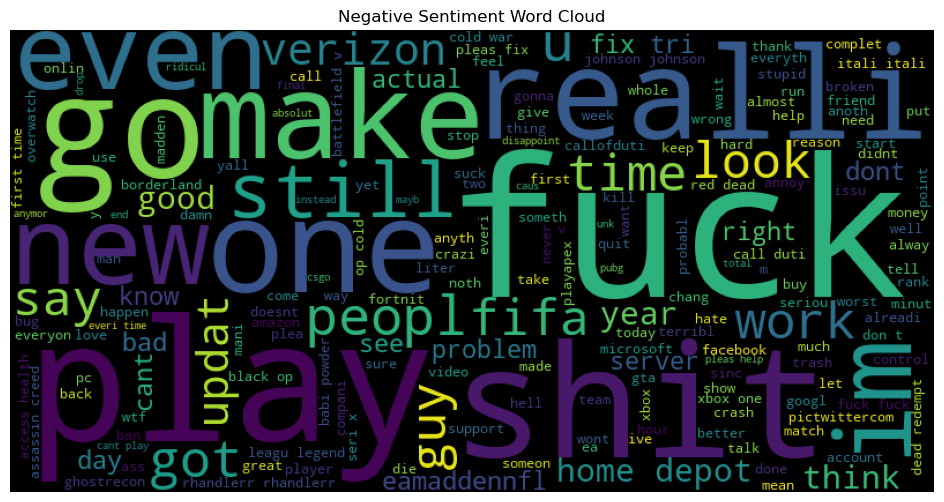

In [23]:
negative = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")
negative = negative.replace("game", "")
if negative.strip():
    wc = WordCloud(width=800, height=400, background_color='black').generate(negative)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

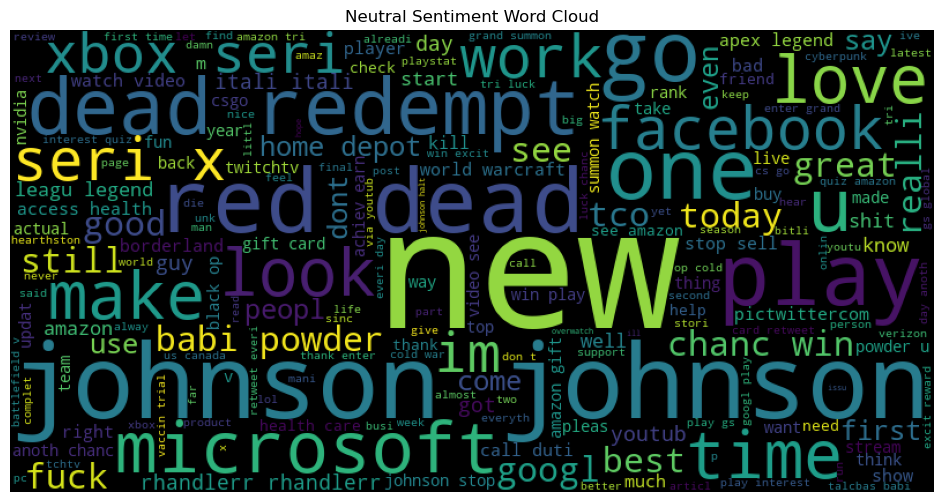

In [27]:
neutral = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")
neutral = neutral.replace("game", "")
if neutral.strip():
    wc = WordCloud(width=800, height=400, background_color='black').generate(neutral)
    plt.figure(figsize=(12, 6))
    plt.title('Neutral Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

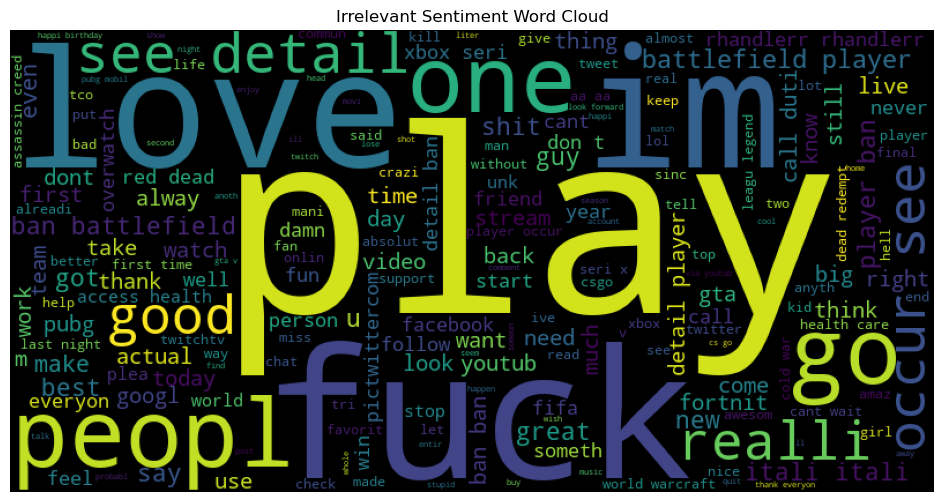

In [25]:
irrelevant = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")
irrelevant = irrelevant.replace("game", "")
if irrelevant.strip():
    wc = WordCloud(width=800, height=400, background_color='black').generate(irrelevant)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")